In [2]:
# load sample dataset
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [5]:
#Setup 
from pycaret.regression import *
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [6]:
#Compare Models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9919,23548657.1177,4832.9329,0.8320,0.4447,0.3137,0.1810
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.4350
catboost,CatBoost Regressor,2899.3783,25762701.9552,5057.5721,0.8163,0.4815,0.3522,1.2490
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.2320
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.3440
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.1240
xgboost,Extreme Gradient Boosting,3278.3216,31628234.0000,5599.0988,0.7709,0.5733,0.4208,0.1570
lr,Linear Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,1.0850
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.1450
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.1030


In [4]:
print(best)

GradientBoostingRegressor(random_state=123)


In [7]:
#Analyze Model : This function analyzes the performance of a trained model on the test set
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [7]:
#Predictions
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2392.5661,17148355.3169,4141.0573,0.8800,0.3928,0.2875


,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,10681.513104
319,32,male,37.334999,1,no,northeast,4667.607422,8043.453463
314,27,female,31.400000,0,yes,southwest,34838.871094,36153.097686
150,35,male,24.129999,1,no,northwest,5125.215820,7435.516853
336,60,male,25.740000,0,no,southeast,12142.578125,14676.544334
...,...,...,...,...,...,...,...,...
1221,40,male,24.969999,2,no,southeast,6593.508301,9264.152792
973,19,female,40.500000,0,no,southwest,1759.338013,2604.919960
1250,24,male,29.830000,0,yes,northeast,18648.421875,18639.490954
887,36,female,30.020000,0,no,northwest,5272.175781,5117.185514


In [8]:
#Save the model
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype(

In [8]:
#Load the model
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\dvid\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWr...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64},
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('

In [10]:
#To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use get_config method.
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [11]:
get_config('test_transformed')

,age,sex,bmi,children,smoker,region_northeast,region_southwest,region_southeast,region_northwest,charges
650,49.0,0.0,42.680000,2.0,0.0,0.0,0.0,1.0,0.0,9800.888672
319,32.0,1.0,37.334999,1.0,0.0,1.0,0.0,0.0,0.0,4667.607422
314,27.0,0.0,31.400000,0.0,1.0,0.0,1.0,0.0,0.0,34838.871094
150,35.0,1.0,24.129999,1.0,0.0,0.0,0.0,0.0,1.0,5125.215820
336,60.0,1.0,25.740000,0.0,0.0,0.0,0.0,1.0,0.0,12142.578125
...,...,...,...,...,...,...,...,...,...,...
1221,40.0,1.0,24.969999,2.0,0.0,0.0,0.0,1.0,0.0,6593.508301
973,19.0,0.0,40.500000,0.0,0.0,0.0,1.0,0.0,0.0,1759.338013
1250,24.0,1.0,29.830000,0.0,1.0,1.0,0.0,0.0,0.0,18648.421875
887,36.0,0.0,30.020000,0.0,0.0,0.0,0.0,0.0,1.0,5272.175781


In [12]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
#set_config('seed', 786)
#print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123


In [ ]:
#All the preprocessing configurations and experiment settings/parameters are passed into the setup function. 
#To see all available parameters, check the docstring:
help(setup)


<AxesSubplot: >

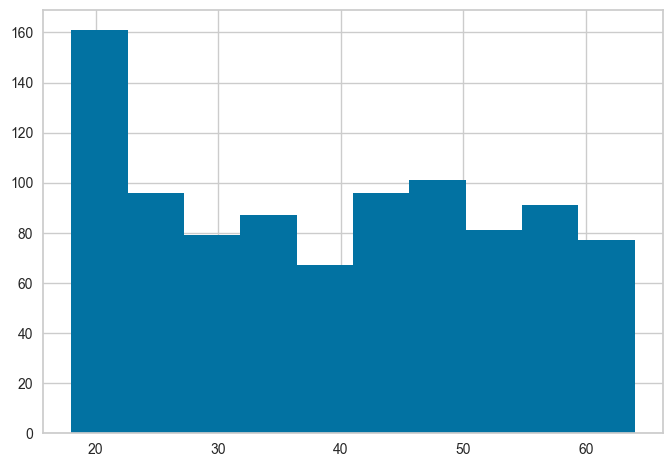

In [14]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['age'].hist()

In [15]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [9]:
#You can use the include and exclude parameter in the compare_models to train only select model or exclude specific 
#models from training by passing the model id's in exclude parameter.
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'lightgbm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9919,23548657.1177,4832.9329,0.8320,0.4447,0.3137,0.2220
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.4180
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.2120
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.3360
dt,Decision Tree Regressor,3383.4916,47823199.0729,6895.7016,0.6497,0.5602,0.4013,0.1120


compare_tree_models

In [10]:
#By default compare_models return the single best performing model based on the metric defined in the sort parameter. 
#Let's change our code to return 3 top models based on MAE.
best_mae_models_top3 = compare_models(sort = 'R2', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9919,23548657.1177,4832.9329,0.8320,0.4447,0.3137,0.1910
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.4060
catboost,CatBoost Regressor,2899.3783,25762701.9552,5057.5721,0.8163,0.4815,0.3522,1.0900
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.2230
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.3320
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.1030
xgboost,Extreme Gradient Boosting,3278.3216,31628234.0000,5599.0988,0.7709,0.5733,0.4208,0.1520
lr,Linear Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.1040
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.0990
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.0860


In [11]:
# list of top 3 models by MAE
best_mae_models_top3

[GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),

Some other parameters that you might find very useful in compare_models are:

fold
cross_validation
budget_time
errors
probability_threshold
parallel
You can check the docstring of the function for more info.

In [ ]:
help(compare_models)

In [ ]:
! pip install mlflow

In [45]:
#Experiment Logging
#PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you 
#can set log_experiment and experiment_name parameter. It will automatically track all the metrics, hyperparameters, 
#and artifacts based on the defined logger.
# Initialiser MLflow, si nécessaire
from pycaret.regression import *
#s = setup(data, target = 'charges', log_experiment='mlflow', experiment_name='insurance_experiment_1')
s = setup(data, target = 'charges', log_experiment=True, experiment_name='insurance_experiment_1')

,Description,Value
0,Session id,3806
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


KeyboardInterrupt: 

In [44]:
# compare models
#best = compare_models()
best= compare_models(include = ['rf'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2747.5031,24409991.5440,4878.2293,0.8292,0.4655,0.3236,1.3650


In [ ]:
#import mlflow
#mlflow.end_run()

In [ ]:
import mlflow
from pycaret.regression import setup, compare_models

# Configurer MLflow et l'experiment
#mlflow.set_experiment(experiment_name='insurance_experiment_1')
mlflow.end_run()
# Démarrer une run MLflow
with mlflow.start_run():
    # Configuration de Pycaret
    #s = setup(data, target='charges', log_experiment=True, experiment_name='insurance_experiment_1')
    s = setup(data, target='charges', log_experiment=True, experiment_name='insurance_experiment_3')
    best = compare_models(include=['rf','gbr', 'ada'])




In [37]:
# start mlflow server on localhost:5000
! mlflow ui

^C


In [33]:
! mlflow --version

mlflow, version 1.30.1


In [87]:
# finalize the model**
final_best = finalize_model(best)

# save model to disk
save_model(final_best, 'rf-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype(

In [95]:
#Notice that you have an address path for the logged_model. This is the trained Pipeline with gradient boosting Regressor. 
#You can read this Pipeline using the load_model function.
# load model**
from pycaret.regression import load_model
#Attention à l'url de l'endroit où est enregitré le model: mettre // et ajouter model à la fin ou recupérer l'endroit où le model est save
pipeline = load_model('C:\\Users\\dvid\\Documents\\Python_ML\\pycaret\\mlruns\\532427584049889183\\37cd802c9f0e4534a8e0c483361adc18\\artifacts\\model\\model')

# print pipeline
print(pipeline)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\dvid\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWr...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64},
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('

In [98]:
#Let’s now use this Pipeline to generate predictions on the new data
# create a copy of data and drop Price
data2 = data.copy()
data2.drop('charges', axis=1, inplace=True)

# generate predictions
from pycaret.regression import predict_model
predictions = predict_model(pipeline, data=data2)
predictions.head()

,age,sex,bmi,children,smoker,region,prediction_label
0,19,female,27.900000,0,yes,southwest,17672.527731
1,18,male,33.770000,1,no,southeast,3552.333646
2,28,male,33.000000,3,no,southeast,7090.431548
3,33,male,22.705000,0,no,northwest,4418.701154
4,32,male,28.879999,0,no,northwest,3341.310788


## ✅ Tune Model
The `tune_model` function tunes the hyperparameters of the model. The output of this function
is a scoring grid with cross-validated scores by fold. The best model is selected based on 
the metric defined in optimize parameter. Metrics evaluated during cross-validation can be 
accessed using the `get_metrics` function. Custom metrics can be added or removed 
using `add_metric` and `remove_metric` function.

In [5]:
# train a dt model with default params
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3244.6173,45002914.9978,6708.4212,0.7312,0.5884,0.4883
1,3121.3069,45456737.6696,6742.1612,0.7357,0.5398,0.3300
2,3646.2662,54445682.2627,7378.7318,0.3107,0.6475,0.4752
3,3228.2250,44536493.7924,6673.5668,0.6281,0.5698,0.4253
4,4344.7470,65261429.3013,8078.4546,0.5146,0.7261,0.6008
5,3497.9281,42984919.0254,6556.2885,0.7235,0.4614,0.3208
6,3464.9372,51736922.8950,7192.8383,0.6480,0.5064,0.3792
7,2804.7111,37461846.7208,6120.6084,0.7940,0.4737,0.1787
8,3080.1801,42102090.8846,6488.6124,0.7281,0.5168,0.4537


In [18]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2079.3178,16156331.5818,4019.4939,0.8290,0.3620,0.2441
1,2007.2941,8593726.7936,2931.5059,0.9283,0.4533,0.4051
2,1794.3844,7402694.0717,2720.7892,0.9390,0.4316,0.2939
3,2537.8045,21000328.0917,4582.6115,0.8878,0.4081,0.3071
4,2669.1751,22355752.8767,4728.1871,0.8316,0.4896,0.3628
5,2355.8902,19661849.1377,4434.1684,0.8434,0.4347,0.3295
6,3060.9321,30917302.8439,5560.3330,0.6533,0.5166,0.3207
7,2475.2932,20985692.3266,4581.0143,0.8389,0.4431,0.2724
8,2005.4008,15328411.9663,3915.1516,0.9026,0.4123,0.2224


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [19]:
dt

DecisionTreeRegressor(random_state=7921)

In [20]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2079.3178,16156331.5818,4019.4939,0.8290,0.3620,0.2441
1,2069.4681,9371589.2611,3061.3052,0.9219,0.4559,0.4088
2,1791.5839,7071582.9416,2659.2448,0.9417,0.4305,0.2941
3,2647.1557,24066130.1660,4905.7242,0.8715,0.4148,0.3150
4,2536.9507,21420311.8941,4628.2083,0.8386,0.4862,0.3536
5,2400.2706,20835294.8937,4564.5695,0.8340,0.4381,0.3315
6,3303.7339,37512626.5329,6124.7552,0.5793,0.5207,0.3265
7,2481.4423,21301988.2219,4615.4077,0.8365,0.4438,0.2723
8,2302.7246,17673951.1527,4204.0399,0.8876,0.4163,0.2384


Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [6]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1745.0008,18073621.2534,4251.3082,0.8920,0.3408,0.1390
1,2380.2671,33969297.4978,5828.3186,0.8025,0.4803,0.1491
2,2005.5481,23477540.5275,4845.3628,0.7027,0.4742,0.1604
3,1986.9419,22156779.8636,4707.0989,0.8150,0.3731,0.1550
4,2255.0797,28517151.4384,5340.1453,0.7879,0.4832,0.1465
5,1961.7810,20794913.6607,4560.1440,0.8662,0.3653,0.1287
6,1643.3779,20046377.2842,4477.3181,0.8636,0.3309,0.1144
7,2049.2066,26281892.4673,5126.5868,0.8555,0.4653,0.1298
8,1991.8599,23667668.4391,4864.9428,0.8471,0.3865,0.1452


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [22]:
# model object
tuned_dt

DecisionTreeRegressor(max_depth=4, max_features=1.0,
                      min_impurity_decrease=0.0001, min_samples_leaf=2,
                      min_samples_split=5, random_state=7921)

In [7]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['age',
                                                                          'bmi',
                                                                          'children'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWrapper(include=['sex',
                                                                          'smoker',
                                                                          'region'],
                                                                 transformer=SimpleImputer(strategy='most_fr...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   random_state=123, refit=False, scoring='r2', verbose=1)

In [ ]:
#!pip install optuna

In [8]:
#The default search algorithm is RandomizedSearchCV from sklearn. This can be changed by using search_library and search_algorithm parameter.
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2808.3933,21097952.6412,4593.2508,0.8740,0.4336,0.3404
1,3089.0169,30093695.9695,5485.7721,0.8250,0.4490,0.3085
2,2689.2039,21546881.5884,4641.8619,0.7272,0.4883,0.3556
3,2977.5091,20954029.7921,4577.5572,0.8250,0.4626,0.4173
4,3157.3181,26146377.2970,5113.3528,0.8055,0.4800,0.3424
5,2663.4375,17862013.6723,4226.3476,0.8851,0.3785,0.2884
6,2637.7698,20262904.8136,4501.4336,0.8621,0.4125,0.3373
7,2796.9770,23934399.6163,4892.2796,0.8684,0.4666,0.3342
8,2747.1934,20047359.4580,4477.4278,0.8705,0.4308,0.3724


[I 2024-02-04 11:31:17,257] Searching the best hyperparameters using 936 samples...
[I 2024-02-04 11:31:36,437] Finished hyperparameter search!


In [9]:
tuned_dt

DecisionTreeRegressor(max_depth=4, max_features=0.9574321949378881,
                      min_impurity_decrease=0.00038325164329285766,
                      min_samples_leaf=4, min_samples_split=7,
                      random_state=123)

In [10]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Custom
ID,,,,,,,,
mae,MAE,MAE,<function mean_absolute_error at 0x0000015E387...,neg_mean_absolute_error,pred,{},False,False
mse,MSE,MSE,<function mean_squared_error at 0x0000015E3871...,neg_mean_squared_error,pred,{},False,False
rmse,RMSE,RMSE,<function mean_squared_error at 0x0000015E3871...,neg_root_mean_squared_error,pred,{'squared': False},False,False
r2,R2,R2,<function r2_score at 0x0000015E38714820>,r2,pred,{},True,False
rmsle,RMSLE,RMSLE,<function RMSLEMetricContainer.__init__.<local...,"make_scorer(root_mean_squared_log_error, great...",pred,{},False,False
mape,MAPE,MAPE,<function MAPEMetricContainer.__init__.<locals...,"make_scorer(mean_absolute_percentage_error, gr...",pred,{},False,False


In [11]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2600.6286,23287999.1449,4825.7641,0.8609,0.4636,0.2991
1,2862.9868,30185856.3778,5494.1657,0.8245,0.4884,0.3060
2,2761.1526,25077468.6110,5007.7409,0.6825,0.5192,0.3371
3,2959.6835,27814653.3277,5273.9599,0.7677,0.5196,0.4226
4,3071.6925,30916545.2241,5560.2649,0.7701,0.5671,0.3901
5,2853.7139,24983085.0973,4998.3082,0.8393,0.3669,0.2570
6,2500.5954,22313062.9978,4723.6705,0.8482,0.3611,0.2562
7,2608.9227,25672109.5843,5066.7652,0.8588,0.4672,0.2438
8,2371.3768,20017410.8875,4474.0821,0.8707,0.4132,0.3070


BaggingRegressor(estimator=DecisionTreeRegressor(random_state=123),
                 random_state=123)

In [12]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1746.6531,20643719.4928,4543.5360,0.8767,0.4074,0.1675
1,2241.8726,32362162.4596,5688.7751,0.8118,0.4118,0.1286
2,2392.6530,32847809.4992,5731.3009,0.5841,0.5593,0.2931
3,1945.1432,21809063.2050,4670.0175,0.8179,0.3644,0.1662
4,2798.9886,37099381.8334,6090.9262,0.7241,0.5916,0.3102
5,3206.2470,42138546.9895,6491.4210,0.7289,0.4406,0.2501
6,1975.4315,26028317.7743,5101.7955,0.8229,0.3365,0.1408
7,1990.4079,24096760.1889,4908.8451,0.8675,0.4472,0.1479
8,2094.1024,25474853.1172,5047.2619,0.8355,0.4142,0.2000


AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=123),
                  n_estimators=10, random_state=123)

In [13]:
# help(ensemble_model)
help(ensemble_model)

Help on function ensemble_model in module pycaret.regression.functional:

ensemble_model(estimator, method: str = 'Bagging', fold: Union[int, Any, NoneType] = None, n_estimators: int = 10, round: int = 4, choose_better: bool = False, optimize: str = 'R2', fit_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, return_train_score: bool = False) -> Any
    This function ensembles a given estimator. The output of this function is
    a score grid with CV scores by fold. Metrics evaluated during CV can be
    accessed using the ``get_metrics`` function. Custom metrics can be added
    or removed using ``add_metric`` and ``remove_metric`` function.
    
    
    Example
    --------
    >>> from pycaret.datasets import get_data
    >>> boston = get_data('boston')
    >>> from pycaret.regression import *
    >>> exp_name = setup(data = boston,  target = 'medv')
    >>> dt = create_model('dt')
    >>> bagged_dt = ensemble_model(dt, method = 'B

In [14]:
ensemble_model(dt, method = 'Boosting', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1746.6531,20643719.4928,4543.5360,0.8767,0.4074,0.1675
1,2241.8726,32362162.4596,5688.7751,0.8118,0.4118,0.1286
2,2392.6530,32847809.4992,5731.3009,0.5841,0.5593,0.2931
3,1945.1432,21809063.2050,4670.0175,0.8179,0.3644,0.1662
4,2798.9886,37099381.8334,6090.9262,0.7241,0.5916,0.3102
5,3206.2470,42138546.9895,6491.4210,0.7289,0.4406,0.2501
6,1975.4315,26028317.7743,5101.7955,0.8229,0.3365,0.1408
7,1990.4079,24096760.1889,4908.8451,0.8675,0.4472,0.1479
8,2094.1024,25474853.1172,5047.2619,0.8355,0.4142,0.2000


AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=123),
                  n_estimators=10, random_state=123)

In [15]:
best_mae_models_top3 = compare_models(sort = 'R2', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9919,23548657.1177,4832.9329,0.8320,0.4447,0.3137,0.1730
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.4180
catboost,CatBoost Regressor,2899.3783,25762701.9552,5057.5721,0.8163,0.4815,0.3522,1.1580
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.2220
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.3530
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.1410
xgboost,Extreme Gradient Boosting,3278.3216,31628234.0000,5599.0988,0.7709,0.5733,0.4208,0.1510
lr,Linear Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.1280
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.0870
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.1000


In [16]:
best_mae_models_top3

[GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),

In [17]:
#The blend_models function trains a VotingRegressor for select models passed in the estimator_list parameter. The output of this function is 
#a scoring grid with CV scores by fold.
# blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2614.1742,21086189.8666,4591.9702,0.8741,0.4565,0.3304
1,2892.2109,29459011.5360,5427.6156,0.8287,0.4393,0.2834
2,2626.2382,22736604.9719,4768.2916,0.7121,0.5171,0.3612
3,2946.4009,22245494.0433,4716.5129,0.8143,0.4997,0.4152
4,2987.4563,29068629.8659,5391.5332,0.7838,0.5311,0.3439
5,2762.7567,20471563.7182,4524.5512,0.8683,0.3585,0.2634
6,2449.0180,19456350.8734,4410.9354,0.8676,0.3511,0.2708
7,2646.6650,24268664.4937,4926.3236,0.8666,0.4195,0.2502
8,2243.8016,18717636.9240,4326.3884,0.8791,0.4131,0.3165


VotingRegressor(estimators=[('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=123)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=123)),
                            ('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x0000015E3DBE0B80>)],
                n_jobs=-1)

In [18]:
help(blend_models)

Help on function blend_models in module pycaret.regression.functional:

blend_models(estimator_list: list, fold: Union[int, Any, NoneType] = None, round: int = 4, choose_better: bool = False, optimize: str = 'R2', weights: Union[List[float], NoneType] = None, fit_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, return_train_score: bool = False)
    This function trains a Voting Regressor for select models passed in the
    ``estimator_list`` param. The output of this function is a score grid with
    CV scores by fold. Metrics evaluated during CV can be accessed using the
    ``get_metrics`` function. Custom metrics can be added or removed using
    ``add_metric`` and ``remove_metric`` function.
    
    
    Example
    --------
    >>> from pycaret.datasets import get_data
    >>> boston = get_data('boston')
    >>> from pycaret.regression import *
    >>> exp_name = setup(data = boston,  target = 'medv')
    >>> top3 = compare_mod

In [19]:
# stack models
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2594.2788,19766650.5168,4445.9701,0.8819,0.4368,0.3201
1,2986.6896,30556102.8050,5527.7575,0.8223,0.4793,0.2949
2,2541.7596,22491575.2804,4742.5284,0.7152,0.4932,0.2958
3,2854.3956,21284656.6184,4613.5297,0.8223,0.4729,0.3775
4,2908.6593,27962395.1437,5287.9481,0.7920,0.5190,0.3173
5,2688.0620,19845244.9902,4454.8002,0.8723,0.4006,0.2676
6,2350.3963,20175046.1473,4491.6641,0.8627,0.3333,0.2387
7,2682.4676,24612520.9587,4961.1008,0.8647,0.4264,0.2520
8,2220.6911,17583084.1068,4193.2188,0.8864,0.3689,0.2763


StackingRegressor(cv=5,
                  estimators=[('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123)),
                              ('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x0000015E3DB6FAC0>)],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

In [5]:
#The interpret_model function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). 
#For more info on this, please see https://shap.readthedocs.io/en/latest/
# train lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2896.4964,23611929.4013,4859.2108,0.8590,0.5993,0.3808
1,3075.9419,30047230.7486,5481.5354,0.8253,0.4622,0.3295
2,3090.7426,27877897.1696,5279.9524,0.6470,0.6213,0.4468
3,3247.8918,26531240.5577,5150.8485,0.7785,0.7497,0.5276
4,3263.7660,29391206.7843,5421.3658,0.7814,0.5628,0.3846
5,2930.1800,21751409.5632,4663.8406,0.8601,0.4058,0.2873
6,2733.8071,21012815.3865,4583.9738,0.8570,0.3991,0.3139
7,2865.5796,25843408.7132,5083.6413,0.8579,0.5027,0.2995
8,2715.5680,21671018.5929,4655.2141,0.8600,0.5233,0.4192


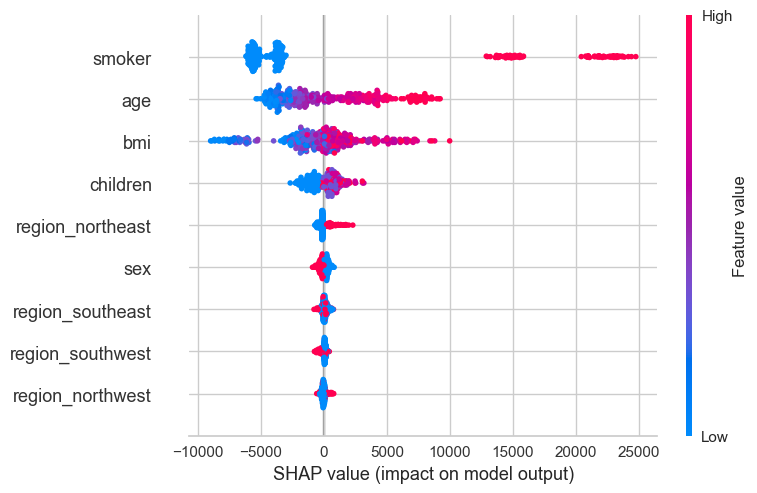

In [4]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [6]:
predict_model(lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2727.6353,20349120.9646,4511.0000,0.8576,0.4906,0.3544


,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,9318.052985
319,32,male,37.334999,1,no,northeast,4667.607422,9479.902222
314,27,female,31.400000,0,yes,southwest,34838.871094,35083.912492
150,35,male,24.129999,1,no,northwest,5125.215820,5952.691971
336,60,male,25.740000,0,no,southeast,12142.578125,16955.956457
...,...,...,...,...,...,...,...,...
1221,40,male,24.969999,2,no,southeast,6593.508301,10969.473501
973,19,female,40.500000,0,no,southwest,1759.338013,3381.087994
1250,24,male,29.830000,0,yes,northeast,18648.421875,18458.241382
887,36,female,30.020000,0,no,northwest,5272.175781,4155.915562


In [8]:
# reason plot for test set observation 2
interpret_model(lightgbm, plot = 'reason', observation = 2)

In [5]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

In [6]:
best_mae_models_top3 = compare_models(sort = 'R2', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9919,23548657.1177,4832.9329,0.8320,0.4447,0.3137,0.1890
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.5570
catboost,CatBoost Regressor,2899.3783,25762701.9552,5057.5721,0.8163,0.4815,0.3522,1.5620
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.2320
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.4140
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.1760
xgboost,Extreme Gradient Boosting,3278.3216,31628234.0000,5599.0988,0.7709,0.5733,0.4208,0.1430
lr,Linear Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.0940
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.1030
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.0910


✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. 
Metrics evaluated can be accessed using the get_metrics function.

In [7]:
# find best model based on CV metrics
automl()

GradientBoostingRegressor(random_state=123)

✅ Dashboard
The dashboard function generates the interactive dashboard for a trained model. 
The dashboard is implemented using ExplainerDashboard. For more information check out Explainer Dashboard.

In [8]:
# dashboard function
dashboard(automl(), display_format ='inline')

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


✅Create App
This function creates a basic gradio app for inference.

In [ ]:
#%pip install pycaret[mlops]
#%pip install gradio

In [13]:
compare_model_results = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9919,23548657.1177,4832.9329,0.8320,0.4447,0.3137,0.2100
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.4760
catboost,CatBoost Regressor,2899.3783,25762701.9552,5057.5721,0.8163,0.4815,0.3522,1.2720
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.2280
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.3620
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.1370
xgboost,Extreme Gradient Boosting,3278.3216,31628234.0000,5599.0988,0.7709,0.5733,0.4208,0.1510
lr,Linear Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,1.1300
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.1170
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.1070


In [24]:
#pull function: stores the output of compare_models as pd.DataFrame
compare_model_results = pull()

In [25]:
# create gradio app
#create_app(best)


In [28]:
import pandas as pd
import gradio as gr

# Supposons que compare_model_results et best sont déjà définis ailleurs dans votre script

def predict(model_name, age, sex, bmi, children, smoker, region):
    df = pd.DataFrame.from_dict({
        'age': [age],
        'sex': [sex],
        'bmi': [bmi],
        'children': [children],
        'smoker': [smoker],
        'region': [region]
    })
    
    # Trouver l'index du modèle sélectionné dans la liste des modèles
    model_index = list(compare_model_results['Model']).index(model_name)
    
    # Sélectionner le modèle entraîné correspondant
    model = best[model_index]
    
    # Faire une prédiction avec le modèle sélectionné
    pred = model.predict(df)
    
    return pred[0]  # Retourner la prédiction

# Création des éléments d'interface Gradio
model_input = gr.inputs.Dropdown(list(compare_model_results['Model']), label="Model")
age_input = gr.inputs.Slider(minimum=0, maximum=100, default=30, label='Age')
sex_input = gr.inputs.Radio(['male', 'female'], label='Sex')
bmi_input = gr.inputs.Number(label='BMI')
children_input = gr.inputs.Slider(minimum=0, maximum=10, default=0, label='Children')
smoker_input = gr.inputs.Radio(['yes', 'no'], label='Smoker')
region_input = gr.inputs.Dropdown(['northeast', 'northwest', 'southeast', 'southwest'], label='Region')

# Créer une interface avec Gradio
gr.Interface(
    fn=predict,
    inputs=[model_input, age_input, sex_input, bmi_input, children_input, smoker_input, region_input],
    outputs="number",
    title="Insurance Cost Prediction",
    description="Select model and input features to predict insurance costs.", live=True).launch()

# Lancer l'interface
interface.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\dvid\anaconda3\envs\pycaretenv\lib\site-packages\gradio\routes.py", line 534, in predict
    output = await route_utils.call_process_api(
  File "C:\Users\dvid\anaconda3\envs\pycaretenv\lib\site-packages\gradio\route_utils.py", line 226, in call_process_api
    output = await app.get_blocks().process_api(
  File "C:\Users\dvid\anaconda3\envs\pycaretenv\lib\site-packages\gradio\blocks.py", line 1550, in process_api
    result = await self.call_function(
  File "C:\Users\dvid\anaconda3\envs\pycaretenv\lib\site-packages\gradio\blocks.py", line 1185, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "C:\Users\dvid\anaconda3\envs\pycaretenv\lib\site-packages\anyio\to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
  File "C:\Users\dvid\anaconda3\envs\pycaretenv\lib\site-packages\anyio\_backends\_asyncio.py", line 2134, in run_sync_in_worker_thread
    return await futu

In [54]:
# load sample dataset
from pycaret.datasets import get_data
data = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,Description,Value
0,Session id,123
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9718,0.9971,0.9718,0.9780,0.9712,0.9573,0.9609,1.1540
knn,K Neighbors Classifier,0.9718,0.9830,0.9718,0.9780,0.9712,0.9573,0.9609,0.0620
qda,Quadratic Discriminant Analysis,0.9718,0.9974,0.9718,0.9780,0.9712,0.9573,0.9609,0.0510
lda,Linear Discriminant Analysis,0.9718,1.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0350
lightgbm,Light Gradient Boosting Machine,0.9536,0.9935,0.9536,0.9634,0.9528,0.9298,0.9356,0.1090
nb,Naive Bayes,0.9445,0.9868,0.9445,0.9525,0.9438,0.9161,0.9207,0.0460
et,Extra Trees Classifier,0.9445,0.9935,0.9445,0.9586,0.9426,0.9161,0.9246,0.2900
catboost,CatBoost Classifier,0.9445,0.9922,0.9445,0.9586,0.9426,0.9161,0.9246,1.0110
gbc,Gradient Boosting Classifier,0.9355,0.9792,0.9355,0.9416,0.9325,0.9023,0.9083,0.3020
dt,Decision Tree Classifier,0.9264,0.9429,0.9264,0.9502,0.9201,0.8886,0.9040,0.0340


In [ ]:
#Setup 
from pycaret.classification import *
s = setup(data, target = 'species', session_id = 123)

In [ ]:
compare_models()
compare_model_results = pull()

In [56]:
best_mae_models_top1 = compare_models(sort = 'Accuracy', n_select = 1)
print(best_mae_models_top1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9718,0.9971,0.9718,0.9780,0.9712,0.9573,0.9609,0.0680
knn,K Neighbors Classifier,0.9718,0.9830,0.9718,0.9780,0.9712,0.9573,0.9609,0.0750
qda,Quadratic Discriminant Analysis,0.9718,0.9974,0.9718,0.9780,0.9712,0.9573,0.9609,0.0350
lda,Linear Discriminant Analysis,0.9718,1.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0380
lightgbm,Light Gradient Boosting Machine,0.9536,0.9935,0.9536,0.9634,0.9528,0.9298,0.9356,0.1820
nb,Naive Bayes,0.9445,0.9868,0.9445,0.9525,0.9438,0.9161,0.9207,0.0460
et,Extra Trees Classifier,0.9445,0.9935,0.9445,0.9586,0.9426,0.9161,0.9246,0.2040
catboost,CatBoost Classifier,0.9445,0.9922,0.9445,0.9586,0.9426,0.9161,0.9246,1.0640
gbc,Gradient Boosting Classifier,0.9355,0.9792,0.9355,0.9416,0.9325,0.9023,0.9083,0.2630
dt,Decision Tree Classifier,0.9264,0.9429,0.9264,0.9502,0.9201,0.8886,0.9040,0.0420


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [57]:
print(best_mae_models_top1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [63]:
model = best_mae_models_top1
df=data
pred = predict_model(model, df, raw_score=True)
pred

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9733,0.9983,0.9733,0.9738,0.9733,0.9600,0.9603


,sepal_length,sepal_width,petal_length,petal_width,species,prediction_label,prediction_score_Iris-setosa,prediction_score_Iris-versicolor,prediction_score_Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa,0.9775,0.0225,0.0000
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa,0.9678,0.0322,0.0000
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa,0.9820,0.0180,0.0000
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,0.9719,0.0281,0.0000
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,0.9813,0.0187,0.0000
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica,0.0001,0.0895,0.9104
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica,0.0004,0.2375,0.7621
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica,0.0003,0.1625,0.8372
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica,0.0001,0.0573,0.9426


In [131]:

model=compare_models(sort = 'Accuracy', n_select = 1)
model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9718,0.9971,0.9718,0.9780,0.9712,0.9573,0.9609,0.0790
knn,K Neighbors Classifier,0.9718,0.9830,0.9718,0.9780,0.9712,0.9573,0.9609,0.0710
qda,Quadratic Discriminant Analysis,0.9718,0.9974,0.9718,0.9780,0.9712,0.9573,0.9609,0.0360
lda,Linear Discriminant Analysis,0.9718,1.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0410
lightgbm,Light Gradient Boosting Machine,0.9536,0.9935,0.9536,0.9634,0.9528,0.9298,0.9356,0.1070
nb,Naive Bayes,0.9445,0.9868,0.9445,0.9525,0.9438,0.9161,0.9207,0.0340
et,Extra Trees Classifier,0.9445,0.9935,0.9445,0.9586,0.9426,0.9161,0.9246,0.2490
catboost,CatBoost Classifier,0.9445,0.9922,0.9445,0.9586,0.9426,0.9161,0.9246,0.8700
gbc,Gradient Boosting Classifier,0.9355,0.9792,0.9355,0.9416,0.9325,0.9023,0.9083,0.3040
dt,Decision Tree Classifier,0.9264,0.9429,0.9264,0.9502,0.9201,0.8886,0.9040,0.0450


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
import pandas as pd
import gradio as gr

# load sample dataset
from pycaret.datasets import get_data
#data = get_data('iris')

#Setup 
from pycaret.classification import *
#s = setup(data, target = 'species', session_id = 123)

#compare_models()
#compare_model_results = pull()

#best_mae_models_top1 = compare_models(sort = 'Accuracy', n_select = 1)
#print(best_mae_models_top1)

# Supposons que best_mae_models_top1 est votre liste de modèles correspondante, où chaque nom dans model_names
# est associé à un modèle spécifique dans cette liste.
# Vous devez remplacer cette liste par vos modèles réels.
model=compare_models(sort = 'Accuracy', n_select = 1)

def predict(selected_model, sepal_length, sepal_width, petal_length, petal_width):
    df = pd.DataFrame.from_dict({
        'sepal_length': [sepal_length], 
        'sepal_width': [sepal_width],
        'petal_length': [petal_length], 
        'petal_width': [petal_width]
    })
    
    # Trouver l'objet modèle sélectionné par l'utilisateur
    #model_index = model_names
    #model = best_mae_models_top1  # Assurez-vous que cette variable contient vos modèles
    #model_index=list(compare_model_results['Model'])
    #model=compare_models(sort = 'Accuracy', n_select = 1)
    pred = predict_model(model, df, raw_score=True)  # Assurez-vous que cette fonction est correctement définie pour utiliser votre modèle
    # Ajustez les clés selon les colonnes retournées par votre modèle
    #return pred["prediction_label"][0]
    result = f"La classe prédite est: {pred['prediction_label'][0]}\n\n" \
             f"Iris-setosa: {pred['prediction_score_Iris-setosa'][0].astype('float64')}\n\n" \
             f"Iris-versicolor: {pred['prediction_score_Iris-versicolor'][0].astype('float64')}\n\n" \
             f"Iris-virginica: {pred['prediction_score_Iris-virginica'][0].astype('float64')}"
    
    return result

# Inputs de Gradio
demo=gr.Interface( predict,
    [ 
        gr.Dropdown( list(compare_model_results['Model']), label="Model"),
        gr.Slider(minimum=1, maximum=10, default=data['sepal_length'].mean(), label = 'sepal_length'),
        gr.Slider(minimum=1, maximum=10, default=data['sepal_width'].mean(), label = 'sepal_width'),
        gr.Slider(minimum=1, maximum=10, default=data['petal_length'].mean(), label = 'petal_length'),
        gr.Slider(minimum=1, maximum=10, default=data['petal_width'].mean(), label = 'petal_width'),
    ],
    "text",
              )

# Interface Gradio

#==> Pour que demo.launch(share=True), il faut désactiver la protection en temps réel de l'antivirus présent sur l'ordinateur
#demo.launch(share=True)
demo.launch()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9718,0.9971,0.9718,0.9780,0.9712,0.9573,0.9609,0.0720
knn,K Neighbors Classifier,0.9718,0.9830,0.9718,0.9780,0.9712,0.9573,0.9609,0.0530
qda,Quadratic Discriminant Analysis,0.9718,0.9974,0.9718,0.9780,0.9712,0.9573,0.9609,0.0370
lda,Linear Discriminant Analysis,0.9718,1.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0440
lightgbm,Light Gradient Boosting Machine,0.9536,0.9935,0.9536,0.9634,0.9528,0.9298,0.9356,0.1490
nb,Naive Bayes,0.9445,0.9868,0.9445,0.9525,0.9438,0.9161,0.9207,0.0460
et,Extra Trees Classifier,0.9445,0.9935,0.9445,0.9586,0.9426,0.9161,0.9246,0.2370
catboost,CatBoost Classifier,0.9445,0.9922,0.9445,0.9586,0.9426,0.9161,0.9246,0.9270
gbc,Gradient Boosting Classifier,0.9355,0.9792,0.9355,0.9416,0.9325,0.9023,0.9083,0.2740
dt,Decision Tree Classifier,0.9264,0.9429,0.9264,0.9502,0.9201,0.8886,0.9040,0.0400


Running on local URL:  http://127.0.0.1:7908

To create a public link, set `share=True` in `launch()`.


In [134]:
%pip freeze

aiofiles==23.2.1
alembic==1.13.1
altair==5.2.0
annotated-types==0.6.0
ansi2html==1.9.1
anyio==4.2.0
asttokens==2.4.1
attrs==23.2.0
backcall==0.2.0
blinker==1.7.0
boto3==1.34.34
botocore==1.34.34
catboost==1.2.2
category-encoders==2.6.3
certifi==2023.11.17
cffi==1.16.0
charset-normalizer==3.3.2
click==8.1.7
cloudpickle==2.2.1
colorama==0.4.6
colorlog==6.8.2
colour==0.1.5
comm==0.2.1
contourpy==1.1.1
cycler==0.12.1
Cython==3.0.8
dacite==1.8.1
dash==2.14.2
dash-auth==2.1.0
dash-bootstrap-components==1.5.0
dash-core-components==2.0.0
dash-cytoscape==1.0.0
dash-html-components==2.0.0
dash-table==5.0.0
databricks-cli==0.18.0
debugpy==1.8.0
decorator==5.1.1
Deprecated==1.2.14
deprecation==2.1.0
dill==0.3.8
docker==6.1.3
dtreeviz==2.2.2
entrypoints==0.4
evidently==0.2.8
exceptiongroup==1.2.0
executing==2.0.1
explainerdashboard==0.4.5
fairlearn==0.7.0
fastapi==0.109.1
fastjsonschema==2.19.1
ffmpy==0.3.1
filelock==3.13.1
Flask==2.2.3
flask-simplelogin==0.1.2
Flask-WTF==1.2.1
fonttools==4.47.2
fs

In [ ]:

import pandas as pd
import gradio as gr

# Supposons que best_mae_models_top1 est votre liste de modèles correspondante, où chaque nom dans model_names
# est associé à un modèle spécifique dans cette liste.
# Vous devez remplacer cette liste par vos modèles réels.

def predict(selected_model, sepal_length, sepal_width, petal_length, petal_width):
    df = pd.DataFrame.from_dict({
        'sepal_length': [sepal_length], 
        'sepal_width': [sepal_width],
        'petal_length': [petal_length], 
        'petal_width': [petal_width]
    })
    
    # Trouver l'objet modèle sélectionné par l'utilisateur
    model_index = model_names
    model = best_mae_models_top1  # Assurez-vous que cette variable contient vos modèles
    
    pred = predict_model(model, df, raw_score=True)  # Assurez-vous que cette fonction est correctement définie pour utiliser votre modèle
    # Ajustez les clés selon les colonnes retournées par votre modèle
    #return pred["prediction_label"][0]
    result = f"La classe prédite est: {pred['prediction_label'][0]}\n\n" \
             f"Iris-setosa: {pred['prediction_score_Iris-setosa'][0].astype('float64')}\n\n" \
             f"Iris-versicolor: {pred['prediction_score_Iris-versicolor'][0].astype('float64')}\n\n" \
             f"Iris-virginica: {pred['prediction_score_Iris-virginica'][0].astype('float64')}"
    
    return result

# Inputs de Gradio
demo=gr.Interface( predict,
    [ 
        gr.Dropdown( list(compare_model_results['Model']), label="Model"),
        gr.Slider(minimum=1, maximum=10, default=data['sepal_length'].mean(), label = 'sepal_length'),
        gr.Slider(minimum=1, maximum=10, default=data['sepal_width'].mean(), label = 'sepal_width'),
        gr.Slider(minimum=1, maximum=10, default=data['petal_length'].mean(), label = 'petal_length'),
        gr.Slider(minimum=1, maximum=10, default=data['petal_width'].mean(), label = 'petal_width'),
    ],
    "text",
              )

# Interface Gradio

#==> Pour que demo.launch(share=True), il faut désactiver la protection en temps réel de l'antivirus présent sur l'ordinateur
#demo.launch(share=True)
demo.launch()

In [122]:
#For free permanent hosting and GPU upgrades
!gradio deploy

^C


In [10]:
#!python my_first_api.py

Transformation Pipeline and Model Successfully Loaded


INFO:     Started server process [5840]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
ERROR:    [Errno 10048] error while attempting to bind on address ('127.0.0.1', 8000): une seule utilisation de chaque adresse de socket (protocole/adresse réseau/port) est habituellement autorisée
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.


In [ ]:
# %load my_first_api.py

import pandas as pd
from pycaret.regression import load_model, predict_model
from fastapi import FastAPI
import uvicorn
from pydantic import create_model

# Create the app
app = FastAPI()

# Load trained Pipeline
model = load_model("my_first_api")

# Create input/output pydantic models
input_model = create_model("my_first_api_input", **{'age': 36, 'sex': 'male', 'bmi': 27.549999237060547, 'children': 3, 'smoker': 'no', 'region': 'northeast'})
output_model = create_model("my_first_api_output", prediction=6746.7427)


# Define predict function
@app.post("/predict", response_model=output_model)
def predict(data: input_model):
    data = pd.DataFrame([data.dict()])
    predictions = predict_model(model, data=data)
    return {"prediction": predictions["prediction_label"].iloc[0]}


if __name__ == "__main__":
    uvicorn.run(app, host="127.0.0.1", port=8000)


✅ Create Docker
This function creates a Dockerfile and requirements.txt for productionalizing API end-point.

In [14]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [15]:
%load DockerFile

In [16]:
# %load requirements.txt

pycaret
fastapi
uvicorn


✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [17]:
final_best = finalize_model(best)

In [18]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker'],
                                    transfor...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64},
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=123))])

✅ Convert Model
This function transpiles the trained machine learning model's decision function in different programming 
languages such as Python, C, Java, Go, C#, etc. It is very useful if you want to deploy models into environments 
where you can't install your normal Python stack to support model inference.

In [23]:
dt = create_model('dt')

In [ ]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))